## YOU CAN EXECUTE EACH CELL WITH CTRL+ENTER

# Understand the Titanic Case

The Titanic case is a famous Machine Learning problem.

We have the passengers list, **and the goal is to predict who were likely to survive!**

Yes, that is creepy ... but it works like a charm :)

Learn it on [Kaggle](https://www.kaggle.com/c/titanic)!

For this tutorial, you must fill the **TODO part** :

In [1]:
# Theses imports are for charts (with matplotlib and seaborn)
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


# Step 1: Load and analyze the data

First, load the dataset with [pandas](http://pandas.pydata.org) and analyze metadata

In [2]:
# Import pandas library. By convention, pandas is renamed to 'pd'.
import pandas as pd

Load the dataset with [```pd.read_csv```](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) method and affect it to ```df``` (df = DataFrame)

In [3]:
# TODO
df = pd.read_csv('data.csv')

Show metadatas with the [```df.info()```](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html) method:

In [4]:
# TODO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
id                 891 non-null int64
name               891 non-null object
gender             891 non-null object
age                714 non-null float64
sibling_spouse     891 non-null int64
parent_children    891 non-null int64
fare               891 non-null float64
passenger_class    891 non-null object
survived           891 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


Okay. Let's understand what we have :

```
RangeIndex: 891 entries, 0 to 890
```

We have 891 rows in the dataset.

Columns are:

* ```id```: Unique identifier of the passenger
* ```name```: Name of the passenger
* ```gender```: Sex of the passenger (male OR female)
* ```age```: Age of the passenger (could be used to determine if passenger is a child or an adult)
* ```sibling_spouse```: Number of siblings OR spouses with the passenger (brother, sister, spouse, etc.)
* ```parent_children```: Number of parent OR children with the passenger (father, mother, son, daugther, etc.)
* ```fare```: Ticket price
* ```passenger_class```: Class of the ticket. There was 3 classes on the Titanic: 1st to 3th (1st is the most rich).
* ```survived```: Does the passenger survived to the shipwreck ? We want to **predict** this column.

Remark: The ```age``` column has empty value (714/891). If we use this column, we have to fill empty value (otherwise algorithm will crash).

Show content with [```df.head()```](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) method (the first 5 lines):

In [5]:
# TODO
df.head()

,id,name,gender,age,sibling_spouse,parent_children,fare,passenger_class,survived
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,cl3,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,cl1,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,cl3,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,cl1,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,cl3,0


# Step 2: Create our first model

Now, it's time to create our first model. 


We will use a classic logistic regression ([```LogisticRegression```](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)) from [SciKit Learn](http://scikit-learn.org).

But, we need to evaluate the model! So, we will use a cross validation function.

This method will randomly split the dataset and check if the model can predict the real value.

In [6]:
from sklearn.model_selection import cross_val_score
import numpy as np

def compute_score(model, X, y):
    # Evaluate the model with random train/set, 5 times
    scores = cross_val_score(model, X, y, cv=5, error_score='raise')
    
    # And return the average of the 5 scores
    return np.mean(scores)

To test our models, we need to define the target.

Affect the ```df.survived``` column to the ```y``` value:

In [7]:
# TODO
y = df.survived

For our first model, we will use ```fare```, ```sibling_spouse``` and ```parent_children```.

Affect theses columns to the ```X``` dataset:

In [8]:
# TODO
X = df[['fare', 'sibling_spouse', 'parent_children']]

Now, a ```X``` dataset can be trained with our ```y``` target.

Instanciate a [```LogisticRegression```](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) classifier and create a score with the ```compute_score``` function:

In [9]:
from sklearn.linear_model import LogisticRegression

# TODO
lr = LogisticRegression(solver='liblinear')
compute_score(lr, X, y)

0.674548857768335

This score is **good** !!!

But we could improve it. Let's add some features to the dataset.

# Step 3: Add the ```passenger_class``` feature

There was 3 passenger classes on the Titanic: 1st to 3th (1st is the most rich).

**Can the ```passenger_class``` help to predict the ```survived``` ?**

We will combine theses columns on a bar chart from [seaborn](https://stanford.edu/~mwaskom/software/seaborn).

Use the [```sns.countplot()```](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.countplot.html) method to show it (x is ```survived```, hue is ```passenger_class```):

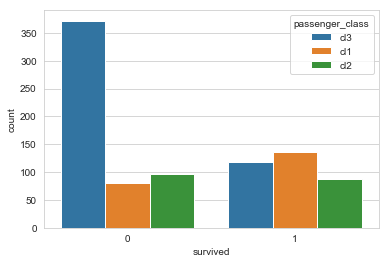

In [10]:
# TODO
sns.countplot(x='survived', hue='passenger_class', data=df)

It's obvious! If you bought a 3th class ticket, you died.

Let's add the ```passenger_class``` to our ```X``` dataset.

In [11]:
# TODO
X = df[['fare', 'sibling_spouse', 'parent_children', 'passenger_class']]

And score with our [```LogisticRegression```](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) classifier:

**WARNING**: Execute it but it cannot work!

In [12]:
# TODO
#lr = LogisticRegression(solver='liblinear')
#compute_score(lr, X, y)

It cannot work!

We added a **Categorical column** to a numerical model (logistic regression).

To convert categorical column to numerical column, we use the One Versus All trick.

We have 3 columns, one by category (c1, c2 or c3). If the passenger is in a category, value is 1. Otherwise, value is 0.

```
cl1 = [1, 0, 0]
cl2 = [0, 1, 0]
cl3 = [0, 0, 1]
```

Fortunately, Pandas has a method [```pd.get_dummies```](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to create column. 

The syntax is :

```
class_dummies = pd.get_dummies(df[columns], columns=columns)
```

(```columns``` is an array of names)

Create all columns and affect them to the ```class_dummies``` value:

In [13]:
# TODO
columns = ['passenger_class']
class_dummies = pd.get_dummies(df[columns], columns=columns)

Let's see the head of ```class_dummies```:

In [14]:
# TODO
class_dummies.head()

,passenger_class_cl1,passenger_class_cl2,passenger_class_cl3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


Now, use [```df.join```](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) method to merge previous columns with ```class_dummies``` and create the ```X``` dataset:

In [15]:
# TODO
X = df[['fare', 'sibling_spouse', 'parent_children']].join(class_dummies)

And score with our [```LogisticRegression```](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) classifier:

In [16]:
# TODO
lr = LogisticRegression(solver='liblinear')
compute_score(lr, X, y)

0.6926591973081655

We improved the score with **2 points** !!!

Let's continue :)

# Step 4: Add the ```gender``` feature

On a boat, **Women and children first !**

**Can the ```gender``` help to predict the ```survived``` ?**

We will combine theses columns on a bar chart.

Use the [```sns.countplot()```](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.countplot.html) method to show it (x is ```survived```, hue is ```gender```):

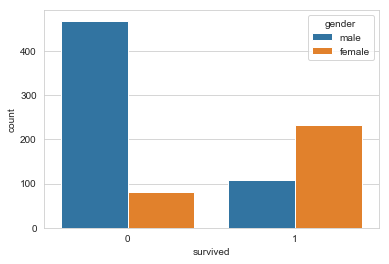

In [17]:
# TODO
sns.countplot(x='survived', hue='gender', data=df)

It's obvious ! Men **died** and women **lived**.

Let's add the ```gender``` to our ```X``` dataset.

Be carefull! ```gender``` is a categorical column, like ```passenger_class```.

So, we need to use the [```pd.get_dummies```](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) method:

In [18]:
# TODO
columns = ['passenger_class', 'gender']
class_dummies = pd.get_dummies(df[columns], columns=columns)
class_dummies

,passenger_class_cl1,passenger_class_cl2,passenger_class_cl3,gender_female,gender_male
0,0,0,1,0,1
1,1,0,0,1,0
2,0,0,1,1,0
3,1,0,0,1,0
4,0,0,1,0,1
5,0,0,1,0,1
6,1,0,0,0,1
7,0,0,1,0,1
8,0,0,1,1,0
9,0,1,0,1,0


Now, use [```df.join```](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) method to merge previous columns with ```class_dummies``` and create the ```X``` dataset:

In [19]:
# TODO
X = df[['fare', 'sibling_spouse', 'parent_children']].join(class_dummies)

And score with our [```LogisticRegression```](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) classifier:

In [20]:
# TODO
lr = LogisticRegression(solver='liblinear')
compute_score(lr, X, y)

0.7946119334545482

We improved the score with **10 points** !!! ```gender``` is a very good ```feature```.

Let's continue to improve our score :)

# Step 5: Create the is_child feature

**Can the ```age``` help to predict the ```survived``` ?**

We will combine theses columns on a violin chart (because ```age``` is a discrete value).

Use the [```sns.violinplot()```](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html#seaborn.violinplot) method to show it (x is ```survived```, y is ```age```):

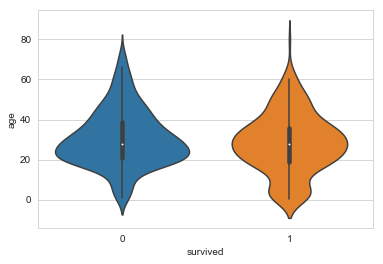

In [21]:
# TODO
sns.violinplot(x='survived', y='age', data=df)

This time, it is not obvious.

Be if we have a clother look at the ```survived``` violin, there is are lot of passenger under 8 years old who survived!

So, we can create a new feature ```is_child``` to help our model.

However, remember the data analysis ! The age column contains empty values. So we need to fill them. But, we need to carefully choose the value: it could downgrade our score. A good choice is to use the **median**.

Combine [```df.fillna()```](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) method and [```df.median()```](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html) method to fill empty value:

In [22]:
# TODO
df.age = df.age.fillna(df.age.median())

Now, all values are filled.

Let's create a new column **is_child** if the age is stricly under 8 :

In [23]:
# TODO
df['is_child'] = df.age < 8

Now, create the ```X``` dataset with ```is_child```:

In [24]:
# TODO
columns = ['passenger_class', 'gender']
class_dummies = pd.get_dummies(df[columns], columns=columns)
    
X = df[['fare', 'sibling_spouse', 'parent_children', 'is_child']].join(class_dummies)

And score with our [```LogisticRegression```](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) classifier:

In [25]:
# TODO
lr = LogisticRegression(solver='liblinear')
compute_score(lr, X, y)

0.8069654197285114

We improved the score with **1 point** !!!

Let's change our algorithm :)

# Step 6: Replace algorithm by a Random Forest

For previous steps, we used a logical regression. Let's try another algorithm, the Random Forest !

Use the [```RandomForestClassifier```](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with 100 estimators :

In [26]:
from sklearn.ensemble import RandomForestClassifier

# TODO
rf = RandomForestClassifier(n_estimators=300)
compute_score(rf, X, y)

0.8114972513881366

We improved the score with **1 point** !!!

You're a good datascientist :)